### Multiclass Classification

When we have more than 2 classes as an option, it's known as **multi-class classification.**
* This means if there are 3 classes, it is a mulit-class classification problem.
* If we have 100 classes, it is a multi-class classification problem.

To practice multi-class classification, we are going to build a neural network to classify images of different items of clothing.

The data is already split in test and train datasets

* Train - 60k images
* Test - 10k images

Each example is a 28*28 grayscale image, associated with a label from 10 classes. 

Label	Description
* 0	T-shirt/top
* 1	Trouser
*2	Pullover
*3	Dress
*4	Coat
*5	Sandal
*6	Shirt
*7	Sneaker
*8	Bag
*9	Ankle boot

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(f"Training example {train_data[0]}")
print(f"Training label {train_labels[0]}")

Training example [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [6]:
# 28*28 pixel
train_data[0].shape

(28, 28)

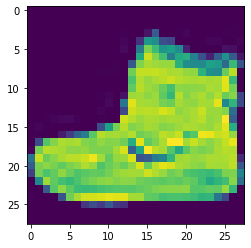

In [7]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [8]:
train_labels[0]

9

As we can see 9 refers to boots and the image is also boots.

In [9]:
# Create a list for our reference
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

Text(0.5, 1.0, 'T-shirt/top')

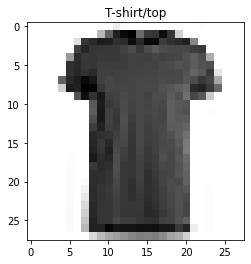

In [10]:
# Plot an example image with the class name as label
# Our images are coloured which might be difficult for us to interpret, so we convert them to binary(black and white)
index_of_choice = 17
plt.imshow(train_data[17],cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

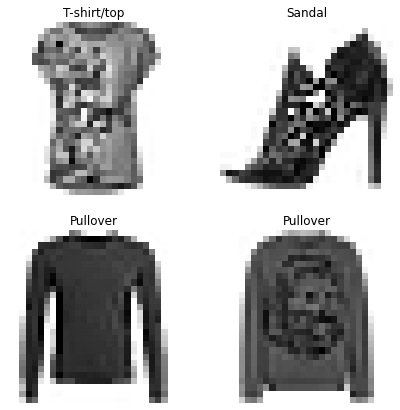

In [11]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

### Building a multiclass classification model

Architecture of multiclass classification model
* Input shape = 28*28 (the shape of one image)
* Output shape = 10 (number of classes of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()

    @ If the labels are one hot encoded we have to go with **CategoricalCrossEntropy**

    @ If the labels are not one hot encoded we have to go with **SparseCategoricalCrossentropy**

* Output layer activation = Softmax(not sigmoid) 

# **If we get any shape errors look for input shape, output shape and loss functions**

---


In [12]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
# In this case we also include the validation set. So that we can test how the model is performing for unseen data.
# Since we dont have validation set we use the test data set.
non_norm_history = model_11.fit(train_data, train_labels, epochs=10 , validation_data=(test_data,test_labels))

Epoch 1/10


ValueError: ignored

We get the following error because of shape mismatch. We have 28*28 matrix and we have 4 neurons in the first layer. So we have 28 + 4 = 32.

In order to avoid this we flatten the tensor

In [13]:
flatten_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28))
])
flatten_model.output_shape

(None, 784)

**It is of atmost importance to provide a tensor with single dimension to the the model. For that purpose we use flatten**

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
# In this case we also include the validation set. So that we can test how the model is performing for unseen data.
# Since we dont have validation set we use the test data set.
non_norm_history = model_11.fit(train_data, train_labels, epochs=10 , validation_data=(test_data,test_labels))

Epoch 1/10


ValueError: ignored

We get this error because **categorical cross entropy** loss function expects our **labels to be in one-hot representation**. But in our cases the labels are categorically encoded [0-9]. So we use **SparseCategoricalCrossentropy** for this application.

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
)

# Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs=10,
  validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.8192 - accuracy: 0.1345 - val_loss: 1.7951 - val_accuracy: 0.2100
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7426 - accuracy: 0.2323 - val_loss: 1.6439 - val_accuracy: 0.3022
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6413 - accuracy: 0.2837 - val_loss: 1.6003 - val_accuracy: 0.2818
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6065 - accuracy: 0.2888 - val_loss: 1.5964 - val_accuracy: 0.2958
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5988 - accuracy: 0.3031 - val_loss: 1.5948 - val_accuracy: 0.3005
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5888 - accuracy: 0.3078 - val_loss: 1.5678 - val_accuracy: 0.3195
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5668 - accuracy: 0.3213 - val_loss: 1.5695 - val_accuracy:

So we do that or else we can one hot encode the tensor and perform CategoricalCrossentropy itself. The one hot encoded code is below

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
)

# Fit the model
non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels, depth= 10), epochs=10,
  validation_data = (test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.8192 - accuracy: 0.1345 - val_loss: 1.7951 - val_accuracy: 0.2100
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7426 - accuracy: 0.2323 - val_loss: 1.6439 - val_accuracy: 0.3022
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6413 - accuracy: 0.2837 - val_loss: 1.6003 - val_accuracy: 0.2818
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6065 - accuracy: 0.2888 - val_loss: 1.5964 - val_accuracy: 0.2958
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5988 - accuracy: 0.3031 - val_loss: 1.5948 - val_accuracy: 0.3005
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5888 - accuracy: 0.3078 - val_loss: 1.5678 - val_accuracy: 0.3195
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5668 - accuracy: 0.3213 - val_loss: 1.5695 - val_accuracy:

Normalise the data


In [17]:
train_data.min(), train_data.max()

(0, 255)

In [18]:
maxi = train_data.max()
train_data_norm = train_data / maxi
test_data_norm = test_data / maxi

In [19]:
# build model with normalised data

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_12.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
)

# Fit the model
norm_history = model_12.fit(train_data_norm, tf.one_hot(train_labels, depth= 10), epochs=10,
  validation_data = (test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

Due to normalisation the accuracy of the model has improved from 34% to 80% 

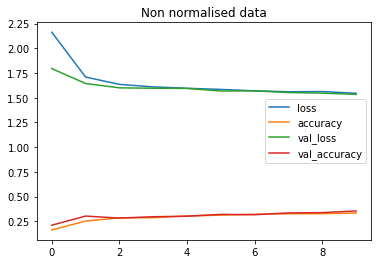

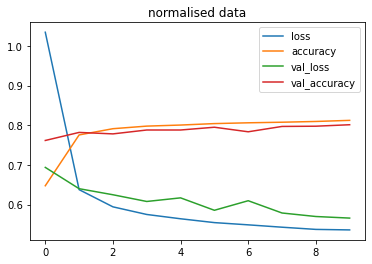

In [20]:
import pandas as pd
# Plot non-normalised data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non normalised data")
# Plot normalised data loss curves
pd.DataFrame(norm_history.history).plot(title="normalised data")

**Find the best learning rate for the model**

In [21]:
 # set random seed
 tf.random.set_seed(42)

 # Create model
 model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
 ])

 # Compile model
 model_13.compile(
   loss = tf.keras.losses.SparseCategoricalCrossentropy(),
   optimizer = tf.keras.optimizers.Adam(),
   metrics=["accuracy"]
 )

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 20))

 # Fit the model
 find_lr_history = model_13.fit(train_data_norm,
                                train_labels,
                                epochs = 40,
                                validation_data=(test_data_norm, test_labels),
                                callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6479 - accuracy: 0.7707 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5978 - accuracy: 0.7901 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5768 - accuracy: 0.7978 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5630 - accuracy: 0.7995 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5577 - accuracy: 0.8003 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5506 - accuracy: 0.8043 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

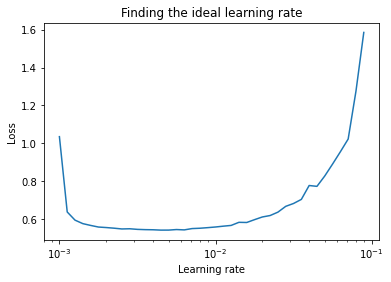

In [22]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

The best way to find the ideal learning rate is to find the lowest point in the curve and move a bit towards the left. As we can see the graph has reached it's lowest point somewhere after 0
.001. So we choose 0.001 as our ideal learning rate.

In [23]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"]
)

# Fit the model
model_14.fit(train_data_norm, 
             train_labels,
             epochs=20,
             validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

### Evaluating our multiclass classification model

* Evaluate it's problem using other classification metrics(such as confusion matrix).
* Assess some of it's predictions(through visualisations).

In [40]:
import itertools
from sklearn.metrics import confusion_matrix 

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=10):
  # Create the confusion matrix
  conf_matrix = confusion_matrix(y_true, y_pred)

  # Normalise our confusion matrix
  conf_matrix_normalised = conf_matrix.astype("float") / conf_matrix.sum(axis=1)[:,np.newaxis]
  n_classes = conf_matrix.shape[0]

  # let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot

  cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
  fig.colorbar(cax)


  if classes:
    labels = classes
  else:
    labels = np.arange(conf_matrix.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="predicted label",
        ylabel="true label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colours
  threshold = (conf_matrix.max() + conf_matrix.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(conf_matrix.shape[0 ]), range(conf_matrix.shape[1])):
    plt.text(j , i ,f"{conf_matrix[i,j]}  ({conf_matrix_normalised[i,j]*100:.1f}%)",
            horizontalalignment = "center",
            color="white" if conf_matrix[i,j] > threshold else "black" ,
            size = text_size)

Make some predictions with our model

In [25]:
# In our cases there are 10 classes. So for every input we will get an 
# output array of size 10. Which has the probabilities of the input being classified to any of those classes. So the maximum probability
# for a particular class means that input belongs to that class

# probs is short for prediction probabilities. 

y_probs = model_14.predict(test_data_norm)

y_probs[:5]

array([[8.5630336e-11, 3.5361509e-13, 2.6633865e-05, 4.6356046e-08,
        5.0950021e-05, 9.6119225e-02, 8.1778381e-08, 9.1868617e-02,
        4.0605213e-03, 8.0787390e-01],
       [3.4278683e-06, 1.2899412e-16, 9.5989138e-01, 2.0516255e-07,
        1.5329245e-02, 2.4532243e-13, 2.4142915e-02, 1.1383623e-28,
        6.3271803e-04, 4.4789552e-08],
       [6.1063176e-05, 9.9657673e-01, 4.3867061e-08, 3.3405994e-03,
        1.3249499e-05, 1.4383491e-21, 8.2790693e-06, 7.3237471e-18,
        5.4811817e-08, 4.9225428e-14],
       [7.5031145e-05, 9.9053687e-01, 4.2528288e-07, 9.2231687e-03,
        1.3623090e-04, 1.8276231e-18, 2.6808115e-05, 4.8124743e-14,
        1.4521548e-06, 2.2211462e-11],
       [7.2190031e-02, 1.5495797e-06, 2.5566885e-01, 1.0363121e-02,
        4.3541368e-02, 1.1069260e-13, 6.1693019e-01, 6.7543135e-23,
        1.3049162e-03, 1.2140360e-09]], dtype=float32)

**Find the class with highest probability**

In [30]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5630336e-11, 3.5361509e-13, 2.6633865e-05, 4.6356046e-08,
        5.0950021e-05, 9.6119225e-02, 8.1778381e-08, 9.1868617e-02,
        4.0605213e-03, 8.0787390e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

As we can see we first find the index of the maximum element and check it with our array of classes to get the exact class

In [34]:
# Convert all the prediction probabilities into integers
y_preds = y_probs.argmax(axis = 1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

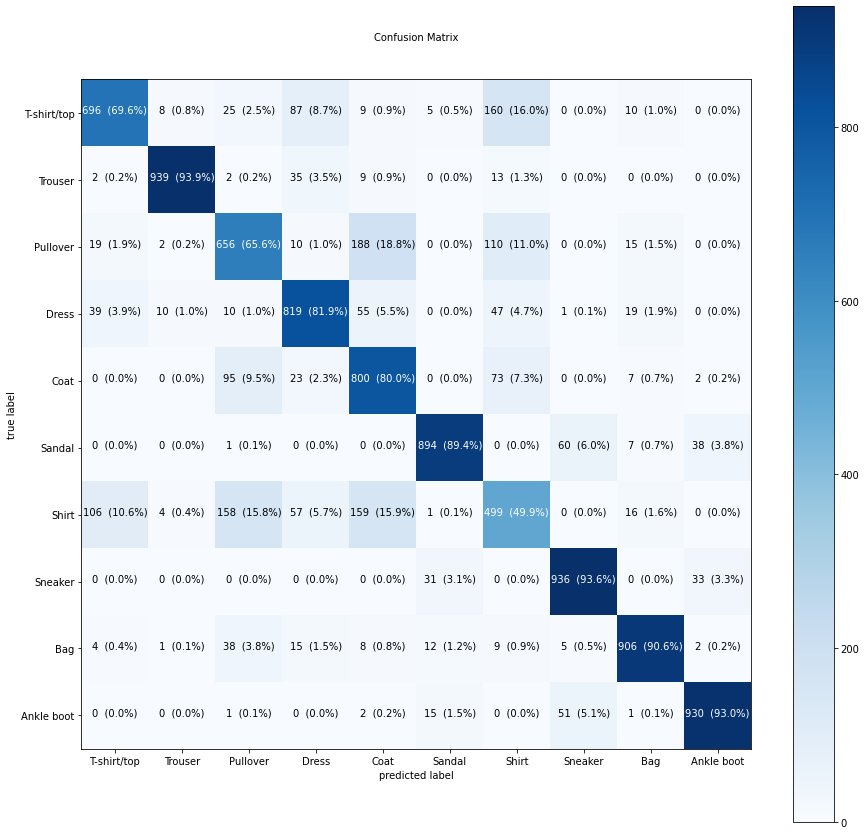

In [42]:
make_confusion_matrix(test_labels, y_preds, classes=class_names, figsize=(15,15))

* Plot a random image
* Make a prediction on the said image
* Label the plot with the true label and the predicted label



In [45]:
# Picks a random image, plots it and labels it with a prediction and true label. 

def plot_random_image(model, images, true_labels, classes):

  # Set up random integer
  i = random.randint(0,len(images))

  # Create predictions and targets
  target_image = images[i]
  # We are predicting for only one model so we give this particular shape
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Add xlabel information (prediction / true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
                                                   color=color) # Set the color to green or red based on if prediction is right or wrong  

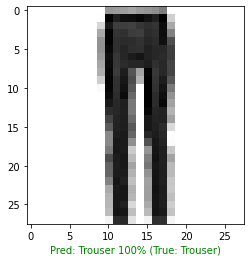

In [52]:
# Check out a random image as well as it's prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names) 

In [53]:
# Find the layers of our most recent model
model_14.layers

In [54]:
# Extract a particular layer
model_14.layers[1]

In [55]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.7150263 , -0.06077094, -0.99763054, -1.048431  ],
        [ 0.27732128, -0.47155392, -0.5291646 ,  0.02329262],
        [ 0.775243  ,  0.540276  , -1.1288569 , -0.7426157 ],
        ...,
        [-0.39453438,  0.47628698, -0.22641574,  0.25505954],
        [-0.4051576 ,  0.6181001 ,  0.23928389, -0.5038765 ],
        [ 0.23884599,  0.11606929, -0.12131333,  0.04352435]],
       dtype=float32), (784, 4))

In [58]:
biases, biases.shape

(array([ 2.4485605e-02, -6.1463297e-04, -2.7230164e-01,  8.1124890e-01],
       dtype=float32), (4,))

* Every neuron has a bias vector. Each of this is paired with a weights matrix.
* The weights matrix gets initialised based on random variables. Then it gets updated according to the input and output for every epoch thereby finding the pattern between the input and output.
* The bias vector of the dense layer is initialised with zeros.
* The **bias vector** dictates **how much the patterns within the corresponding weights matrix should influence the next layer.**


In [59]:
model_14.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_20 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


### Let's check out another way of viewing our deep learning models

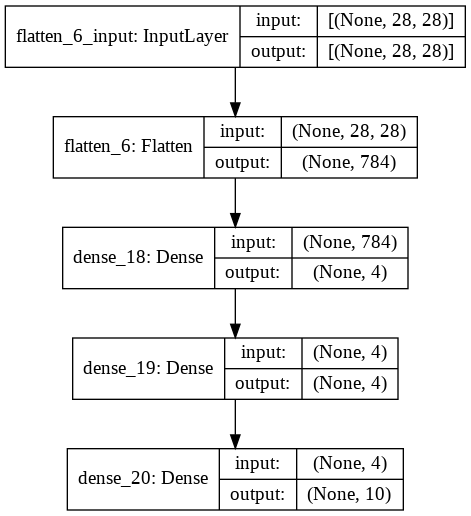

In [60]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)